### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Answer** 

According to [ThoughCo.com](https://www.thoughtco.com/independent-and-dependent-variables-differences-606115), an **independent variable** is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable.<br>
OR <br>
An independant variable is one that does not depend on any other variable for a change to occur

A **dependant varaible** is the variable being tested and measured in a scientific experiment i.e as the independant varibable changes, so does the dependant variable and the change is recorded. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Answer** 

$$ H0 = C - I  == 0 $$
$$ H1 = C - I  != 0 $$

> Where 
- H0 is the null hypothesis 
- H1 is the alternate hypothesis
- C is the mean response time of the congruent words
- I is the mean response time of the incongruent words

The null hyphthesis is that there no difference between the mean response times of the congruent and incongruent words. The alternate hypothesis is that there is some difference between the mean response times of the congruent and the incongruent words. I took this as the hypothesis because the expectation after taking the stroop test myself is that there will be a difference between the response times. 

Considering a few important things:
-  We do not have any population parameters. I am assuming this is a sample of the population 
-  The data set is small so there will not be alot of variation of times seen. 
-  The sizes of the two test are the same

Thus, the most correct way of testing my hypothesis is doing a two-tailed t-test. This is used to compare two population means where you have two samples in which observations in one sample can be paired with observations in the other sample. Since both our data set sizes are the same size, a two tailed t-test seems to be the most viable option. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [40]:
#load csv
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df

Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157

In [41]:
df.describe()

Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000

The main measures of central tendancy comes up with a describe() function with the means of the congruent response times and the incongruent response time being 14.05 and 22.06 so there's an obvious difference seen between the two response times with the incongruent mean being higher than the incongruent means.

The standard deviation of the two response times also shows a difference with 3.5593 and 4.7970 respectively. Once again, we can see that incongruent response times have a standard deviation higher than the congruent response time.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [42]:
import seaborn as sns
sns.set_style('darkgrid')

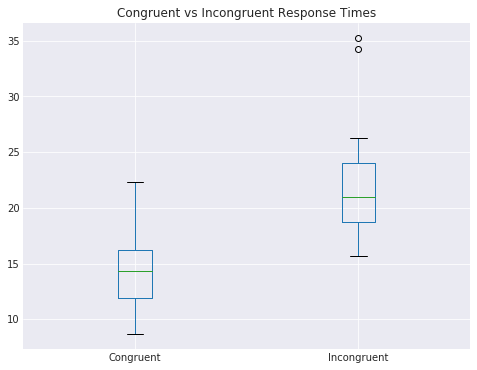

In [43]:
df.plot(figsize=(8, 6), title='Congruent vs Incongruent Response Times', kind='box');

This plot shows that there are obvious outliers in the Incongruent data set. With this, we also see that the range of the Incongruent dataset is also quite large while the Congruent data set does not have any outliers with the response times being significantly less. 

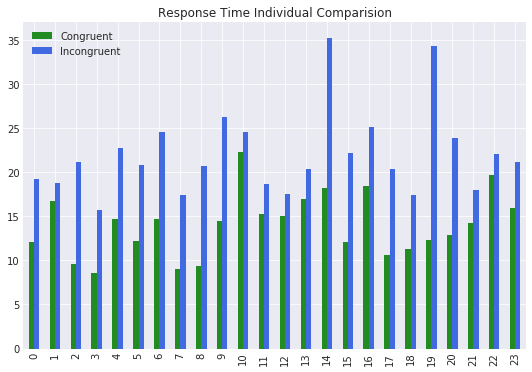

In [48]:
df.plot(figsize=(9, 6), title='Response Time Individual Comparision', kind='bar', color=['forestgreen','royalblue']);

Since the data set is so small, we can make this bar plot which evidently shows that there are no exceptions to the Incongruent response times being significantly higher. Every person in this list who took this test had a higher response time with incongruent data.

You can also see the two outliers, of the incongruent data i.e. number 14 and 19.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

-  We will be using a two tailed t-test
-  The sample sizes of the two sets are the same so means are comparable
-  The confidence level will be 0.05.

In [49]:
import scipy.stats as stats

t, p = stats.ttest_rel(df.Congruent,df.Incongruent)
print('t-statistic =', t, 'p-value =', p)

t-statistic = -8.02070694411 p-value = 4.10300058571e-08


#### Conclusion
-  The t statistic is acompanied by a significantly small p-value i.e 4.103-08 < 0.025 (two-tailed t-test).
-  Thus, we reject the null hypothesis and accept the alternate hypothesis which is that there is a significant difference between the congruent response times and the incongruent response times. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

According to [Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect), there are many theories explaining the stroop effect known as the race conditions. 
-  **Processing speed** which refers to the difference of the speed in recognizing words much faster than colours. 
-  **Selective attention** which suggests that color recognition, as opposed to reading a word, requires more attention.
-  **Automaticity** is the most common theory which suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond where as reading a word is "automatic" due to habitual reading. 
- **Parallel distributed processing** which goes to say that reading a word and recognizing the color is done in parallel which causes interference and thus, slows us down. 

The stroop effect is all around us. Take grocery shopping. You’re walking down a grocery aisle, looking for a particular item. All around this item are colorful variations of the item. They are all similar. You have to find your item. This can be counted in the stroop effect that happens in our everyday life. We need selective attention for these phenonmenon like writting down a list and only selecting everything from that one list. 